In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from main import NeuralNetwork

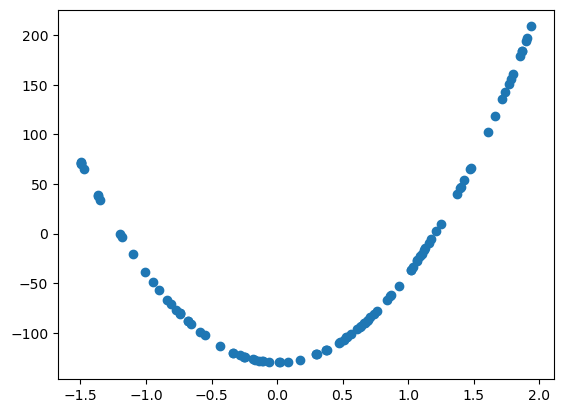

In [2]:
df = pd.read_csv("square-simple-training.csv")
df.drop(df.columns[0], axis=1, inplace=True)
# print(df.head())
plt.scatter(df['x'], df['y'])

In [ ]:
matrix_1 = np.random.normal(loc=0, size=(1, 10))
matrix_2 = np.random.normal(loc=0, size=(10, 1))

while np.any(matrix_1 == 0) or np.any(matrix_2==0):
    matrix_1 = np.random.normal(loc=0, size=(1, 10))
    matrix_2 = np.random.normal(loc=0, size=(10, 1))

weights = [matrix_1, matrix_2]
biases = [np.random.normal(loc=0, size=(1, 10)), np.random.normal(loc=0, size=(1, 1))]


NN = NeuralNetwork(1, [10], weights=weights, biases=biases)
NN.gradient_descent(df['x'], df['y'], batch_size=15, learning_rate=0.1, verbose=True)
# print(NN.MSE)
NN.fit(df['x'], df['y'], batch_size=15, learning_rate=100, epochs=1000, verbose=False)

In [ ]:
print(NN.weights)
print(NN.biases)

In [ ]:
plt.scatter(np.arange(0, len(NN.MSE), 1), NN.MSE)

In [ ]:
y_pred = [NN.predict(x) for x in df['x']]

fig, ax = plt.subplots()
ax.scatter(df['x'], y_pred, color='blue')
ax.scatter(df['x'], df['y'], alpha=0.3, color='red')
ax.set(xlabel='x', ylabel='y')
ax.legend(['predicted', 'real'])
plt.show()

# Normalized

In [3]:
df_normalized = df.copy()
df_normalized['x'] = (df['x'] - df['x'].mean()) / df['x'].std()
df_normalized['y'] = (df['y'] - df['y'].mean()) / df['y'].std()

matrix_1 = np.random.normal(loc=0, size=(1, 10))
matrix_2 = np.random.normal(loc=0, size=(10, 1))

while np.any(matrix_1 == 0) or np.any(matrix_2==0):
    matrix_1 = np.random.normal(loc=0, size=(1, 10))
    matrix_2 = np.random.normal(loc=0, size=(10, 1))

weights = [matrix_1, matrix_2]
biases = [np.random.normal(loc=0, size=(1, 10)), np.random.normal(loc=0, size=(1, 1))]


NN = NeuralNetwork(1, [10], weights=weights, biases=biases)
# NN.gradient_descent(df['x'], df['y'], batch_size=15, learning_rate=0.1, verbose=True)
NN.gradient_descent(pd.Series([-0.5,0,0.5]),pd.Series([0.25,0,0.25]), batch_size=2, learning_rate=0.1, verbose=True)
# NN.fit(df_normalized['x'], df_normalized['y'], batch_size=10, learning_rate=0.5, epochs=1000, verbose=False)

__________________________
Layer 1:
Weights: [[ 0.47495606 -1.94558527  0.41237858  0.54397116  0.8946745  -1.0638428
   1.11317268  0.10430041 -1.18963257 -0.02479165]]
Biases: [[-1.017471   -0.75361138 -0.77824344 -1.40454175  0.54016285  1.12716984
  -0.21901295 -1.07312818 -0.85998842 -1.43646746]]
Layer input shape: (1, 1)
Layer input: [[-0.5]]
Layer output after matrix multiplication and adding biases: (1, 10)
Layer output: [[-1.25494903  0.21918125 -0.98443272 -1.67652733  0.0928256   1.65909124
  -0.77559929 -1.12527838 -0.26517214 -1.42407163]]
Layer output after activation function: [[0.22184461 0.554577   0.27201312 0.15755586 0.52318975 0.84011597
  0.31526911 0.24503351 0.43409271 0.19402407]]
__________________________
Layer 2:
Weights: [[ 0.22724237]
 [-0.53418655]
 [ 1.3680707 ]
 [ 0.07419661]
 [-2.02689497]
 [-2.17525648]
 [-0.43050751]
 [-1.64105986]
 [ 0.66694924]
 [-0.43222581]]
Biases: [[0.13207992]]
Layer input shape: (1, 10)
Layer input: [[0.22184461 0.554577   0

In [ ]:
plt.scatter(np.arange(0, len(NN.MSE), 1), NN.MSE)

In [ ]:
y_pred = [NN.predict(x) for x in df_normalized['x']]

fig, ax = plt.subplots()
ax.scatter(df_normalized['x'], y_pred, color='blue')
ax.scatter(df_normalized['x'], df_normalized['y'], alpha=0.3, color='red')
ax.set(xlabel='x', ylabel='y')
ax.legend(['predicted', 'real'])
plt.show()